In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from importlib import reload
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress

In [3]:
# Study data files
# path of the data sets
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results=mouse_metadata.merge(study_results, how='left', on='Mouse ID')

In [4]:
# Copy of the dataframe created
mousedata_study=mouse_metadata_study_results.copy()

# Renaming column 'Tumor Volume (mm3)' to 'Tumor_volume'
mousedata_study=mousedata_study.rename(columns={'Tumor Volume (mm3)':'Tumor_volume'})

# Display the data table for preview
mousedata_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
print("Number of mice: ", mousedata_study['Mouse ID'].count())

Number of mice:  1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_timepoint_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID', 'Timepoint'])]
mouseid_timepoint_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
mousedata_study=mousedata_study.drop_duplicates(['Mouse ID', 'Timepoint'])
study_results=mousedata_study.copy()
mousedata_study


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Get all the data for the duplicate mouse ID.
mouseid_dupli=mousedata_study[mousedata_study.duplicated(['Mouse ID'])]
mouseid_dupli

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data_results=mousedata_study.drop_duplicates(['Mouse ID'], inplace=False)

In [10]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice after cleaning: ", cleaned_mouse_data_results['Mouse ID'].count())

# A copy of cleaned_mouse_data_results is created
cleaned_data_results=cleaned_mouse_data_results.copy()
cleaned_data_results

Number of mice after cleaning:  249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen=mousedata_study.groupby('Drug Regimen')

mean_tvolume=drug_regimen.Tumor_volume.mean()
# print("The mean of tumor volume: ", mean_tvolume)

median_tvolume=drug_regimen.Tumor_volume.median()
# print("The median of tumor volume: ", median_tvolume)

var_tvolume=drug_regimen.Tumor_volume.var()
# print("The variance of tumor volume: ", var_tvolume)

std_tvolume=drug_regimen.Tumor_volume.std()
# print("The standard deviation of tumor volume: ", std_tvolume)

sem_tvolume=drug_regimen.Tumor_volume.sem()
# print(sem_tvolume)

# Assemble the resulting series into a single summary dataframe.
agg_tumor_volume=pd.DataFrame({"Mean":mean_tvolume, "Median":median_tvolume, "Variance":var_tvolume,
                              "Standard Deviation":std_tvolume, "SEM":sem_tvolume})

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_tumor_volume

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary=drug_regimen.agg({'Tumor_volume':['mean','median','var','std','sem']})
agg_summary = agg_summary.rename(columns={'Tumor_volume':''})
agg_summary

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64


<AxesSubplot:title={'center':'Drug Regimen Tests in Mice'}, xlabel='Drug Regimen', ylabel='Number of Mice'>

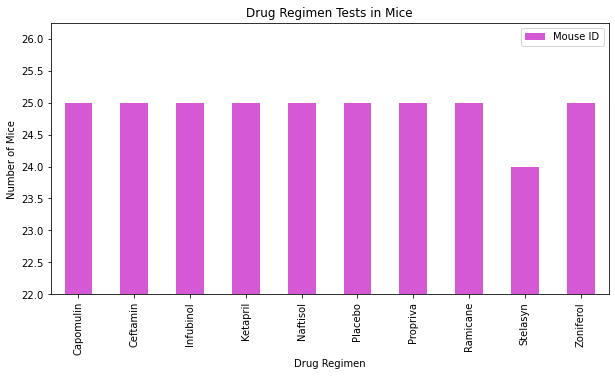

In [13]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# cleaned_data_results is the unique 'Mouse ID' dataframe used for grouping by drug regimen
drug_reg= cleaned_data_results.groupby('Drug Regimen')['Mouse ID'].count()
print(drug_reg)
plt=reload(plt)
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
drug_reg.plot(kind='bar', figsize=(10,5), title='Drug Regimen Tests in Mice', legend='best',
              xlabel='Drug Regimen', ylabel='Number of Mice', ylim=22, stacked=True, color='m', alpha=0.65)

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
[25, 25, 25, 25, 25, 25, 25, 25, 24, 25]


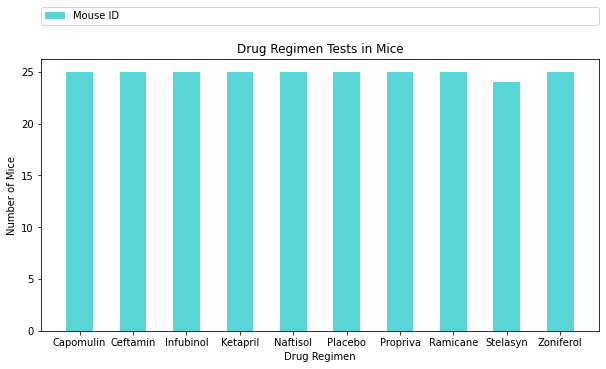

In [14]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt=reload(plt)
# drug_reg dataframe is grouped one by 'Drug Regimen' and 'Mouse ID'
# Index values of drug_reg dataframe is stored in to a list
num_mice= drug_reg.index.tolist()
print(num_mice)

# Finding positions of drug_reg values 
pos=np.arange(len(num_mice))
# print(pos)

# The values of drug_reg dataframe stored as a list
x_axis=list(drug_reg)
print(x_axis)

# Figure size fixing
plt.figure(figsize=(10,5))

# Plotting figure
plt.bar(pos, x_axis, color='c', alpha=0.65, width=0.5, label='Mouse ID')

# Using xticks positional values are assigning
plt.xticks(pos, num_mice)

# Titling the bar graph
plt.title('Drug Regimen Tests in Mice')

# Labeling x_axix
plt.xlabel("Drug Regimen")

# Labeling y_axis
plt.ylabel('Number of Mice')

# Printing legend
# plt.legend('Mouse ID', loc=9)
plt.legend(bbox_to_anchor=(0., 1.09, 1., .102), loc='upper left',ncol=2, mode="expand", borderaxespad=0.)

array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

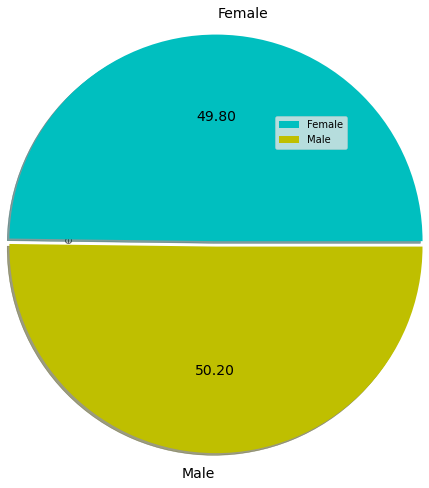

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ml_fl_mice = cleaned_data_results.groupby('Sex')['Mouse ID'].count()
plt.style.use('ggplot')
np.random.seed(123456)
colors=['c', 'y']

explode = (0.05,0)

ml_fl_mice.plot(kind='pie', subplots=True, figsize=(5,5), autopct='%.2f', colors=colors,
               labels=['Female', 'Male'], radius=1.9, explode=explode, fontsize=14, shadow=True,
               legend=1)


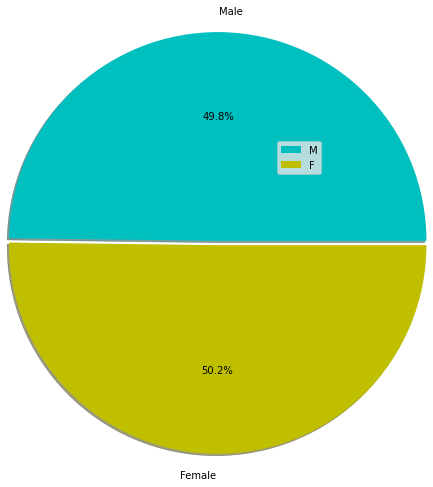

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels in a list
plt=reload(plt)
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
labels=(['Male', 'Female'])

plt.pie(ml_fl_mice, labels=labels, colors=colors, autopct="%1.1f%%", radius=2.4, explode=explode, 
       shadow=True)
plt.legend("MF", loc=1)

## Quartiles, Outliers and Boxplots

In [17]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# time_point_max=study_results.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()
# time_point_max=time_point_max.drop_duplicates('Mouse ID')
# print(time_point_max)

# tumor_volume_least = study_results.groupby(['Mouse ID'])['Tumor_volume'].min().reset_index()
# tumor_volume_least=tumor_volume_least.drop_duplicates('Mouse ID')
# print(tumor_volume_least)

# cleaned_mouse_study_results=time_point_max.merge(tumor_volume_least, how='left', on='Mouse ID')
# print(cleaned_mouse_study_results)

# capomulin_study=cleaned_mouse_study_results.loc[cleaned_mouse_study_results['Drug Regimen']=='Capomulin']
# capomulin_study_results=capomulin_study.Tumor_volume.sort_values().reset_index()
# capomulin_study_results

# Start by getting the last (greatest) timepoint for each mouse descending order
treatment_regimen1 = mousedata_study[['Mouse ID','Timepoint','Drug Regimen'
                                     ]].sort_values(by='Timepoint', ascending=False)
treatment_regimen1

# Start by getting the last tumor volume for each mouse by ascending order
treatment_regimen2 = mousedata_study[['Mouse ID','Tumor_volume']].sort_values(by='Tumor_volume')
treatment_regimen2

# Merging above two dataframe by 'Mouse ID'
treatment_regimen_with_dupli=treatment_regimen1.merge(treatment_regimen2, how='left', on='Mouse ID')

# Dropping duplicate rows by 'Mouse ID'
treatment_regimen=treatment_regimen_with_dupli.drop_duplicates(['Mouse ID'], inplace=False)
# treatment_regimen

    index Mouse ID  Timepoint Drug Regimen  Tumor_volume
0      30     r554         45    Capomulin     31.804841
1      80     m957         45    Capomulin     32.562839
2     180     t565         45    Capomulin     32.868916
3     230     y793         45    Capomulin     31.475411
4     310     u364         45    Capomulin     31.023923
5     440     g316         45    Capomulin     40.159220
6     490     r944         45    Capomulin     40.401765
7     500     l509         45    Capomulin     40.207289
8     510     w914         45    Capomulin     35.611309
9     520     s710         45    Capomulin     40.171920
10    530     v923         45    Capomulin     39.648296
11    550     j119         45    Capomulin     38.125164
12    580     b128         45    Capomulin     37.967644
13    590     b742         45    Capomulin     37.950355
14    600     l897         45    Capomulin     37.682767
15    620     g288         45    Capomulin     36.356851
16    640     i557         45  

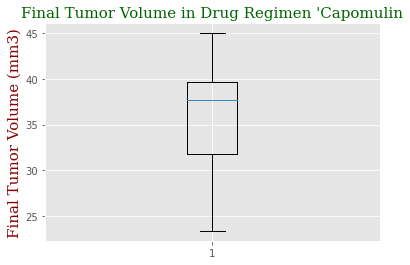

In [18]:
# Determine outliers using upper and lower bounds
# Extracting dataframe with drug regimen 'Capomulin'
capomulin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Capomulin'].reset_index()
print(capomulin_regimen)

# Sorting Tumor Volume and resetting index
capomulin_treatment=capomulin_regimen.Tumor_volume.sort_values()
# print(capomulin_treatment)
    
quartiles = capomulin_treatment.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
font1 = {'family':'serif','color':'darkgreen','size':15}
font2 = {'family':'serif','color':'darkred','size':15}
ax1.set_title("Final Tumor Volume in Drug Regimen 'Capomulin", fontdict=font1)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontdict=font2)
ax1.boxplot(capomulin_treatment)
plt.show()

The lower quartile of tumor volume is: 31.09533505
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.56367122
The the median of tumor volume is: 36.00302016 
Values below 16.749828219999998 could be outliers.
Values above 55.0045131 could be outliers.


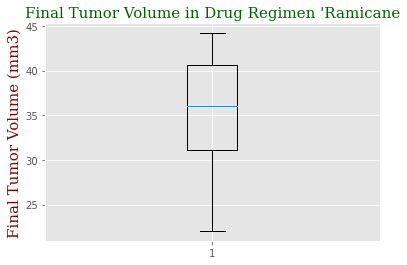

In [19]:
# Extracting dataframe with drug regimen 'Ramicane'
ramicane_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ramicane'].reset_index()
# print(ramicane_regimen)

# Sorting Tumor Volume and resetting index
ramicane_treatment=ramicane_regimen.Tumor_volume.sort_values()
# print(ramicane_regimen)

quartiles = ramicane_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Ramicane", fontdict=font1)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontdict=font2)
ax1.boxplot(ramicane_treatment)
plt.show()

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 0.0
The the median of tumor volume is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


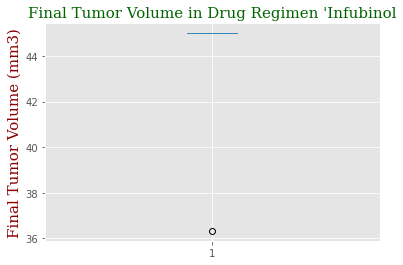

In [20]:
# Extracting dataframe with drug regimen 'Infubinol'
infubinol_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Infubinol'].reset_index()
# print(infubinol_regimen)

# Sorting Tumor Volume and resetting index
infubinol_treatment=infubinol_regimen.Tumor_volume.sort_values()
# print(infubinol_regimen)

quartiles = infubinol_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Infubinol", fontdict=font1)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontdict=font2)
ax1.boxplot(infubinol_treatment)
plt.show()

The lower quartile of tumor volume is: 45.0
The upper quartile of tumor volume is: 45.0
The interquartile range of tumor volume is: 0.0
The the median of tumor volume is: 45.0 
Values below 45.0 could be outliers.
Values above 45.0 could be outliers.


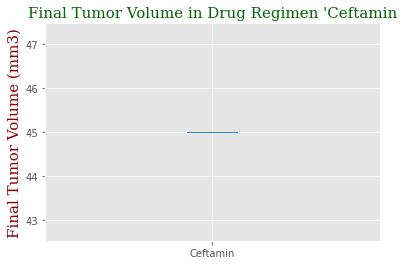

In [21]:
# Extracting dataframe with drug regimen 'Ceftamin'
ceftamin_regimen = treatment_regimen.loc[treatment_regimen['Drug Regimen']=='Ceftamin'].reset_index()
# print(ceftamin_regimen)

# Sorting Tumor Volume and resetting index
ceftamin_treatment=ceftamin_regimen.Tumor_volume.sort_values()
# print(ceftamin_regimen)

quartiles = ceftamin_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Drug Regimen 'Ceftamin", fontdict=font1)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontdict=font2)
ax1.boxplot(ceftamin_treatment)
plt.xticks([1], ['Ceftamin'])
plt.show()


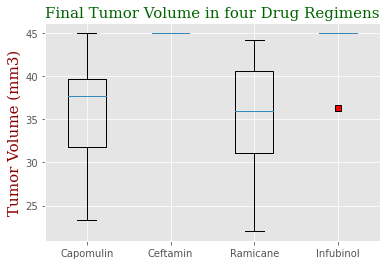

In [22]:
# Box and whisker plot of four drug regimen with tumor volume

red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
drugs=[capomulin_treatment, ceftamin_treatment, ramicane_treatment,  infubinol_treatment]
green_diamond = dict(markerfacecolor='g', marker='D')
ax.boxplot(drugs, flierprops=red_square)

ax.set_title("Final Tumor Volume in four Drug Regimens", fontdict=font1)
ax.set_ylabel("Tumor Volume (mm3)", fontdict=font2)
plt.xticks([1,2,3,4], ['Capomulin','Ceftamin','Ramicane','Infubinol'])
plt.show()


## Line and Scatter Plots

   Tumor_volume  Timepoint
0     45.000000          0
1     43.878496          5
2     37.614948         10
3     38.177232         15
4     36.866876         20
5     33.949940         25
6     32.959671         30
7     28.328531         35
8     25.472143         40
9     23.343598         45


Text(0, 0.5, 'Tumor Volume (MM3)')

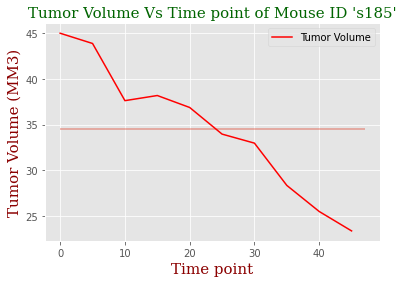

In [31]:
# Line plot Capomulin drug regimen with Timepoint and Tumor Volume

plt=reload(plt)
# One 'Mouse ID' s185 selected for line plot and filtered with tumor volume and timepoint
mouse_capo_tpoint=study_results.loc[study_results['Mouse ID']=='s185', 
                                    ['Tumor_volume', 'Timepoint']].reset_index()
mouse_capo_tpoint=mouse_capo_tpoint[['Tumor_volume', 'Timepoint']
                                   ].sort_values(by='Timepoint')
print(mouse_capo_tpoint)

# print(capo_timepoint)
plt.hlines(34.5,0,47,alpha=0.5)

# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(mouse_capo_tpoint.iloc[:,1], mouse_capo_tpoint.iloc[:,0], color='r', label='Tumor Volume')
plt.legend(loc="best")
plt.title("Tumor Volume Vs Time point of Mouse ID 's185'", fontdict = font1)
plt.xlabel("Time point", fontdict = font2)
plt.ylabel("Tumor Volume (MM3)", fontdict = font2)


In [ ]:

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse_weight = mousedata_study[['Mouse ID','Drug Regimen', 'Weight (g)', 'Tumor_volume'
                                     ]].sort_values(by='Tumor_volume')
# Filtering dataframe by drug regiment 'Capomulin'
capo_mouse_weight=capo_mouse_weight.loc[capo_mouse_weight['Drug Regimen']=='Capomulin']

# Calculating average tumor volume by grouping 'Mouse ID' and Mouse weight and creating new dataframe
avg_tumor_vol=pd.DataFrame(capo_mouse_weight.groupby(['Mouse ID', 'Weight (g)'])['Tumor_volume'].mean().reset_index())

# avg_tumor_vol

In [ ]:

plt=reload(plt)
plt.style.use('seaborn')
fig, ax = plt.subplots()
# Matplotlib scatter plot for mouse weight with average tumor volume
plt.scatter(avg_tumor_vol.iloc[:,1], avg_tumor_vol.iloc[:, 2], marker='o', 
            edgecolor='black', s=100, alpha=0.75, c ='m', label="Avg Tumor Volume")

ax.legend(loc="best")
plt.title("Mouse weight with average Tumor volume", fontdict = font1)
plt.xlabel('Mouse Weight', fontdict = font2)
plt.ylabel('Average Tumor Volume', fontdict = font2)
ax.grid(True)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_wt=avg_tumor_vol.loc[:,'Weight (g)']
tumor_vl=avg_tumor_vol.loc[:,'Tumor_volume']

# Pearson correlation coefficient for mouse weight and average tumor volume
correlation = sts.pearsonr(mouse_wt, tumor_vl)
print(f'Correlation coefficient for mouse weigt and average tumor volume: {round(correlation[0],4)}')


In [ ]:
# Linear regression model for mouse weight with tumor volume
mouse_wt=avg_tumor_vol.loc[:,'Weight (g)']
tumor_vl=avg_tumor_vol.loc[:,'Tumor_volume']

fig, ax = plt.subplots()
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_wt, tumor_vl)
regress_values = mouse_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_wt,tumor_vl)
plt.plot(mouse_wt,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse weight with Tumor volume", fontdict = font1)
plt.xlabel('Mouse Weight', fontdict = font2)
plt.ylabel('Tumor Volume', fontdict = font2)
ax.grid(True)
plt.show()